In [1]:
# notebook환경 -> 프로젝트 루트 경로로 이동
%cd ../../..

/home/user/eda-repo-3


In [2]:
import os
os.getcwd()

'/home/user/eda-repo-3'

In [55]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from scipy.stats import pearsonr, spearmanr
from scipy.cluster.hierarchy import dendrogram, linkage
import warnings
warnings.filterwarnings('ignore')

# ▶️ csv 불러오기 경로 지정
input_path = os.path.join('RESULT','csv','seoul_integrated_data.csv')
# input_path = 'RESULT/csv/seoul_integrated_data.csv'
# os.path.dirname(output_path)
df = pd.read_csv(input_path)

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import koreanize_matplotlib
import folium
from sqlalchemy import create_engine
from shapely.geometry import shape
from io import BytesIO
import base64

from dotenv import load_dotenv
import os
import json

# .env 파일을 찾아 환경 변수로 로드
load_dotenv()

# 환경 변수 가져오기
host = os.getenv("DB_HOST")
user = os.getenv("DB_USER")
password = os.getenv("DB_PASSWORD")
database = os.getenv("DB_NAME")

# ▶️ MySQL 연결
engine = create_engine(f"mysql+pymysql://{user}:{password}@{host}:3306/{database}")


In [ ]:
df

In [56]:
df_sel = df.iloc[:, [1, 7, 14, 3, 12, 11]]
df_sel

,companion_animal_registration,korea_urban_park_info,1인당 공원 면적,hospital_count,pollution_emission_facility,pollution_co_concentration_by_station
0,34843.0,133.0,14.16,94.0,456.0,0.411
1,25515.0,74.0,7.36,47.0,140.0,0.439
2,18585.0,54.0,49.73,27.0,87.0,0.442
3,33636.0,151.0,7.95,50.0,373.0,0.480
4,26408.0,60.0,25.08,27.0,83.0,0.488
5,20272.0,43.0,9.85,33.0,84.0,0.450
6,19412.0,62.0,8.93,29.0,274.0,0.378
7,12925.0,52.0,11.51,16.0,387.0,0.447
8,27138.0,4.0,29.31,45.0,151.0,0.462
9,19873.0,71.0,32.80,26.0,124.0,0.497


In [ ]:
query1 = """
SHOW tables
"""
# pd.read_sql(query1, engine)
pd.read_sql(query1, engine)

In [ ]:
query2 = """
SELECT district_name, total_places FROM pet_friendly_zone_summary
"""
# pd.read_sql(query1, engine)
df_places = pd.read_sql(query2, engine)
df_places = df_places.rename(columns={'district_name': 'district'})


# district와 total_places를 각각 Series로 추출
district_col = df_places['district']
total_places_col = df_places['total_places']
df_places

In [ ]:
# total_places 컬럼을  삽입
df_sel.insert(3, 'total_places', total_places_col)


df_sel

,companion_animal_registration,korea_urban_park_info,1인당 공원 면적,total_places,hospital_count,pollution_emission_facility,pollution_co_concentration_by_station
0,34843.0,133.0,14.16,1084,94.0,456.0,0.411
1,25515.0,74.0,7.36,837,47.0,140.0,0.439
2,18585.0,54.0,49.73,608,27.0,87.0,0.442
3,33636.0,151.0,7.95,569,50.0,373.0,0.480
4,26408.0,60.0,25.08,433,27.0,83.0,0.488
5,20272.0,43.0,9.85,421,33.0,84.0,0.450
6,19412.0,62.0,8.93,414,29.0,274.0,0.378
7,12925.0,52.0,11.51,343,16.0,387.0,0.447
8,27138.0,4.0,29.31,325,45.0,151.0,0.462
9,19873.0,71.0,32.80,320,26.0,124.0,0.497


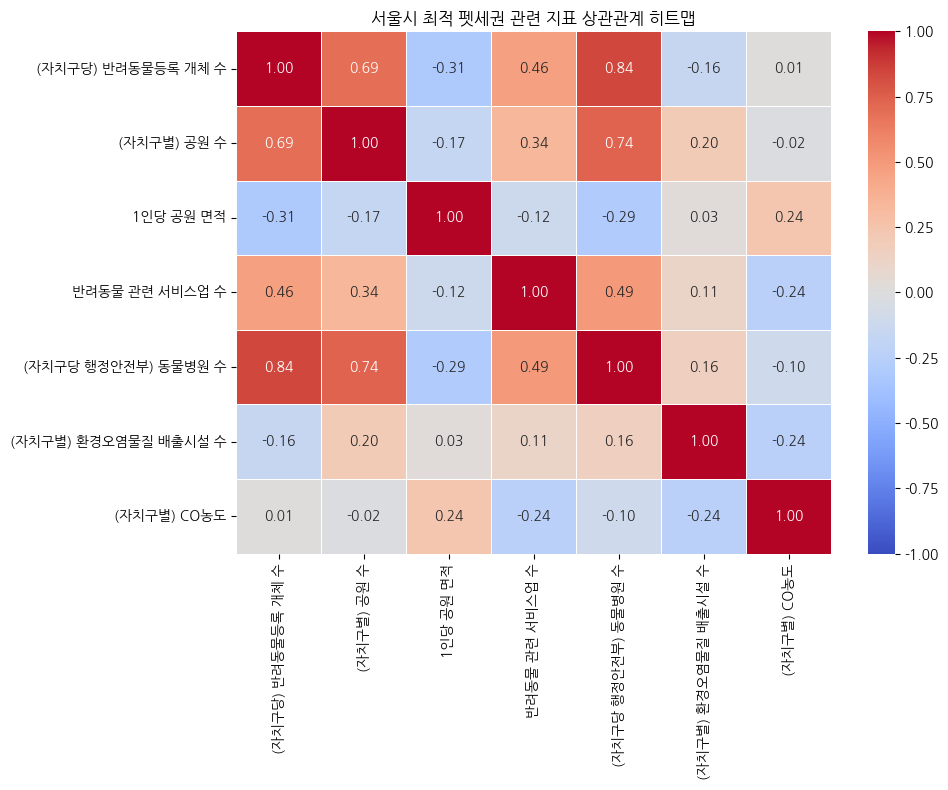

In [ ]:

df_sel.rename(columns=
  {
  'companion_animal_registration' : '(자치구당) 반려동물등록 개체 수',
  'korea_urban_park_info':'(자치구별) 공원 수',
  # '1인당 공원 면적'
  'total_places':'반려동물 관련 서비스업 수',
  'hospital_count': '(자치구당 행정안전부) 동물병원 수',
  'pollution_emission_facility':'(자치구별) 환경오염물질 배출시설 수',
  'pollution_co_concentration_by_station':'(자치구별) CO농도'
  }, inplace=True
)

# 3) 상관계수 계산 -------------------------------------------------------------
corr = df_sel.corr(method='pearson')  # spearman·kendall 도 선택 가능

# 4) 히트맵 시각화 -------------------------------------------------------------
# (한글 폰트 오류 방지) – 시스템 폰트가 'AppleGothic', 'Malgun Gothic' 중 하나면 주석 해제
# plt.rcParams['font.family'] = 'Malgun Gothic'  # Windows
# plt.rcParams['font.family'] = 'AppleGothic'    # macOS

plt.figure(figsize=(10, 8))
sns.heatmap(
    corr,
    annot=True,
    fmt=".2f",
    cmap='coolwarm',
    vmin=-1,
    vmax=1,
    linewidths=.5
)
plt.title('서울시 최적 펫세권 관련 지표 상관관계 히트맵')
plt.tight_layout()


# 5) 화면 출력 & 파일 저장 ------------------------------------------------------
# ▶️ 이미지 저장 경로 지정
output_path = 'RESULT/visualization/통계청_최적_펫세권분석_heatmap.png'
os.makedirs(os.path.dirname(output_path), exist_ok=True)  # 폴더가 없으면 생성

plt.savefig(output_path, dpi=300, bbox_inches='tight')  # 고해상도 저장)  # 필요 시 저장
# plt.show()

<Figure size 640x480 with 0 Axes>